<h1 style="font-size:180%; color:#DC143C;"><i><b>OpenFood database: Task G</b></i></h1>

"Your task is to do an in-depth analysis of the organic vs. non-organic products distribution in the Open Food database. Look for terms such as “bio” and “organic” in the product names. Your analysis should address the following tasks:"

In [1]:
import numpy as np 
import pandas as pd 
import os

#Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import sqlite3

#### Absolute and Relative paths

In [2]:
dirname = os.path.dirname('../input/openfood/')
filename = os.path.join(dirname, 'data_385k.pkl')

In [3]:
filename

'../input/openfood/data_385k.pkl'

### Load OpenFood pickle file

In [4]:
#Load pickle file

df = pd.read_pickle('../input/openfood/data_385k.pkl', compression='zip')

#### Display a sample with a few entries

In [5]:
df.sample(3)

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
42563,2.6,4099200402024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54419,0.0,00075391042700,23.0,mg,12.39,NaN,g,58.0,mg,NaN,...,NaN,NaN,NaN,NaN,1.8,mg,0.0,IU,NaN,NaN
282664,0.0,0688267197581,61.0,mg,67.86,NaN,g,0.0,mg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,IU,NaN,NaN


### Pick only the columns that we need to work and create a new Dataframe (Countries).

In [7]:
Countries = df[["country", "product_name_en", "product_name_de", "product_name_fr"]]
Countries.tail(3)

,country,product_name_en,product_name_de,product_name_fr
385381,CH,NaN,NaN,Lindt - Noir puissant 85% cacao
385382,CH,NaN,NaN,NaN
385383,CH,NaN,NaN,NaN


#### "Look to terms like "Bio" and "organic". 

"The Series.str.contains method expects a regex pattern (by default), not a literal string. Therefore str.contains("^") matches the beginning of any string. Since every string has a beginning, everything matches. Instead use str.contains("\^") to match the literal ^ character."

"To check every column, you could use for col in df to iterate through the column names, and then call str.contains on each column:"

Instead of regex ("\^"), I applied **pattern** cause the requested to **"Look to terms like "Bio" and "organic".**  Then, I defined pattern separated by the bar | (that vertical bar means OR). 

### Filter rows with either of two partial strings (OR)

" The & means combine the masks and return True where both masks are True, while | means return True where any of the masks is True."


Filter rows where both strings are present (AND)

"Where the order does not matter (Bio can appear first in a row), use str.contains('str1.*str2|str2.*str1'). The | means ‘return rows where str1 appears first, or str2 appears first’."

pattern = 'bio.*organic|organic.*bio'

https://shecancode.io/blog/filter-a-pandas-dataframe-by-a-partial-string-or-pattern-in-8-ways/

### The Organic/Bio Food

I didn't include "natural" cause that filter/mask with str.contains, stack and the two suggested words on the task (bio and organic) already returned rows that have "natural" string.

In [8]:
#By https://stackoverflow.com/questions/26640129/search-for-string-in-all-pandas-dataframe-columns-and-filter
#answered by unutbu Oct 29, 2014 at 21:35
#pattern https://shecancode.io/blog/filter-a-pandas-dataframe-by-a-partial-string-or-pattern-in-8-ways/

pattern = 'Bio|organic'

mask = np.column_stack([Countries[col].str.contains(pattern, na=False) for col in Countries])
Countries.loc[mask.any(axis=1)]

,country,product_name_en,product_name_de,product_name_fr
0,CH,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio
2,CH,Caffè Mauro - Roasted organic coffee blend,Caffè Mauro - Bio Kaffe,Caffè Mauro - café bio
8,CH,Naturaplan Bio Flower Honey,Naturaplan Bio Blütenhonig,Naturaplan Miel de fleurs Bio
178,CH,Naturaplan - Coconut milk (organic),Naturaplan - Kokosnussmilch (bio),Naturaplan - Lait de coco (bio
181,CH,Naturaplan - Organic mayonnaise,Naturaplan - Bio-Mayonnaise,Naturaplan - Mayonnaise bio
...,...,...,...,...
385177,CH,NaN,Florentin Organic Chicken - Salade Hummus Bio ...,Florentin Organic Chicken - Salade Hummus Bio ...
385247,CH,Coop Naturaplan Bio - Oolong Green Tea,NaN,NaN
385261,CH,NaN,Florentin Organic Chicken - Salade Hummus Bio ...,Florentin Organic Chicken - Salade Hummus Bio ...
385331,CH,Coop Naturaplan Bio - Oolong Green Tea,NaN,NaN


### Applying the filtering mask to the data using a tilde (~) to negate the statement.

In [9]:
#SheCanCode https://shecancode.io/blog/filter-a-pandas-dataframe-by-a-partial-string-or-pattern-in-8-ways/

non_Bio= Countries.loc[~mask.any(axis=1)]
non_Bio.head()

,country,product_name_en,product_name_de,product_name_fr
1,CH,Naturaplan Mozzarella,Naturaplan Mozzarella,Naturaplan Mozzarella
3,CH,Le chocolat Cailler - chocolate powder,Le chocolat Cailler - schokoladenpulver,Le chocolat Cailler - chocolat en poudre
4,CH,Naturaplan Extra Dark Chocolate 70%,Naturaplan ExtraDunkle Schokolade 70%,Naturaplan Chocolat extra noir 70%
5,CH,NaN,Cailler - Kakaopulver,Cailler - Poudre de cacao
6,CH,Toblerone,Toblerone,Toblerone


#### Non-organic product list/array by countries.

In [10]:
non_Bio['country'].value_counts()

country
US    328285
CH     42115
DE     10536
IT      2715
FR       116
AT         1
UK         1
Name: count, dtype: int64

#### We have a ndarray, instead of a Dataframe.

Therefore,the whole line of the initial mask was used to define Bio dataframe

In [11]:
Bio= Countries.loc[mask.any(axis=1)]
Bio.head()

,country,product_name_en,product_name_de,product_name_fr
0,CH,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio
2,CH,Caffè Mauro - Roasted organic coffee blend,Caffè Mauro - Bio Kaffe,Caffè Mauro - café bio
8,CH,Naturaplan Bio Flower Honey,Naturaplan Bio Blütenhonig,Naturaplan Miel de fleurs Bio
178,CH,Naturaplan - Coconut milk (organic),Naturaplan - Kokosnussmilch (bio),Naturaplan - Lait de coco (bio
181,CH,Naturaplan - Organic mayonnaise,Naturaplan - Bio-Mayonnaise,Naturaplan - Mayonnaise bio


#### Organic products list/array by countries.

In [12]:
Bio['country'].value_counts()

country
CH    1502
DE     103
IT       4
US       4
FR       2
Name: count, dtype: int64

## b) Organic and non-Organic Products percentage

Count the number of organic and non-organic products in each country. Is there a country with a higher percentage of organic products?

Percent of Bio by Countries. **Switzerland** on top. Followed by Deutschland, Italy and France.
There was No need to drop countries with small amount cause they have only one entry that's Non-organic.


In [13]:
#Since True/False corresponds to 1/0, all you need is an astype conversion from bool to int:
#https://www.codecademy.com/learn/stats-summary-statistics-for-categorical-data/modules/stats-summary-statistics-for-categorical-data/cheatsheet

#Organic products Percentage

Bio['country'].value_counts()/Bio['country'].value_counts().sum()

country
CH    0.930031
DE    0.063777
IT    0.002477
US    0.002477
FR    0.001238
Name: count, dtype: float64

### Non-Organic products Percentage by Countries.

In [14]:
#Since True/False corresponds to 1/0, all you need is an astype conversion from bool to int:
#https://www.codecademy.com/learn/stats-summary-statistics-for-categorical-data/modules/stats-summary-statistics-for-categorical-data/cheatsheet

#Non-Organic products Percentage

non_Bio['country'].value_counts()/non_Bio['country'].value_counts().sum()

country
US    0.855423
CH    0.109740
DE    0.027454
IT    0.007075
FR    0.000302
AT    0.000003
UK    0.000003
Name: count, dtype: float64

### Organic Food visualizations

The Pie chart with the Countries percents, showed that the majority of Organic products were made by Switzerland. On the countplot, only Switzerland and Deutschland (German) have significant bars. 

The values on the explode slice was too tiny. I'll try to handle it on the Non-organic charts. 

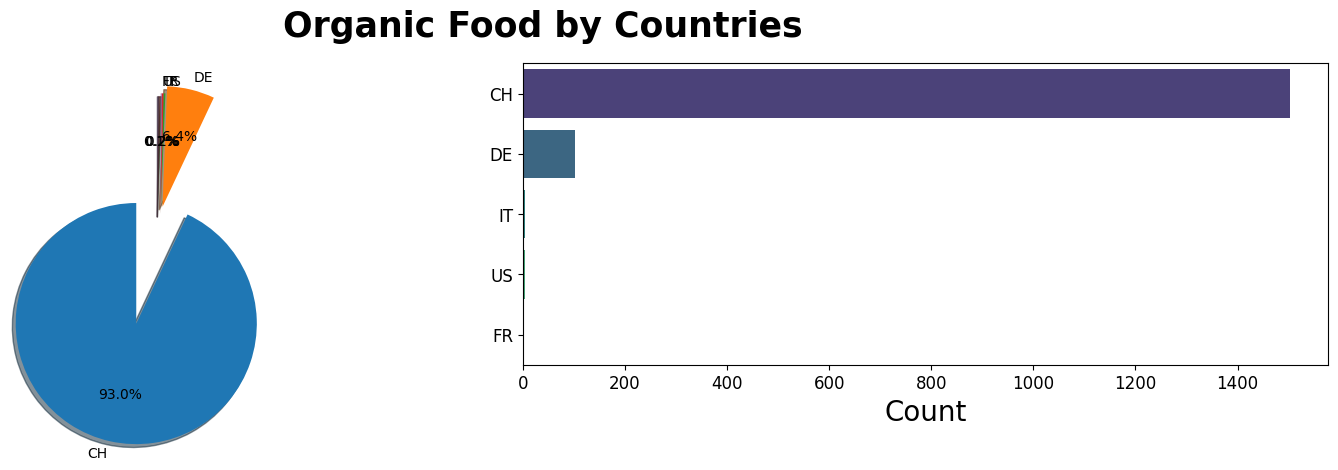

In [15]:
#https://www.kaggle.com/code/mpwolke/not-a-doctor-shh-brooklyn-99
#By Iqbal Syahakbar https://www.kaggle.com/code/iqbalsyahakbar/ps3e18-eda-and-modelling-for-starters/notebook

fig, ax = plt.subplots(1, 2, figsize = (16, 5))
ax = ax.flatten()

labels = 'CH', 'DE', 'IT', 'US', 'FR'
sizes = [1502, 103, 4, 4, 2]
explode = (0.93, 0.063, 0.0024, 0.0024, 0.0012)

ax[0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    


sns.countplot(data = Bio, y = 'country', ax = ax[1], palette = 'viridis', order = Bio['country'].value_counts().index)
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize = 12)
ax[1].set_xlabel('Count', fontsize = 20)
ax[1].set_ylabel(None)
plt.xticks(fontsize = 12)

fig.suptitle('Organic Food by Countries', fontsize = 25, fontweight = 'bold')
plt.tight_layout()

### Non-Organic Products Piechart and Countplot

I commented the explode line cause the Pie slices are overlapping and even the countries abbreviations were NOT visible. I also increased the figsize, unfortunately, their percents are still tiny, not allowing to see the respective values.

I **DID NOT GET** why US percent is 0.8554 below, however the US slice shows 94.9%

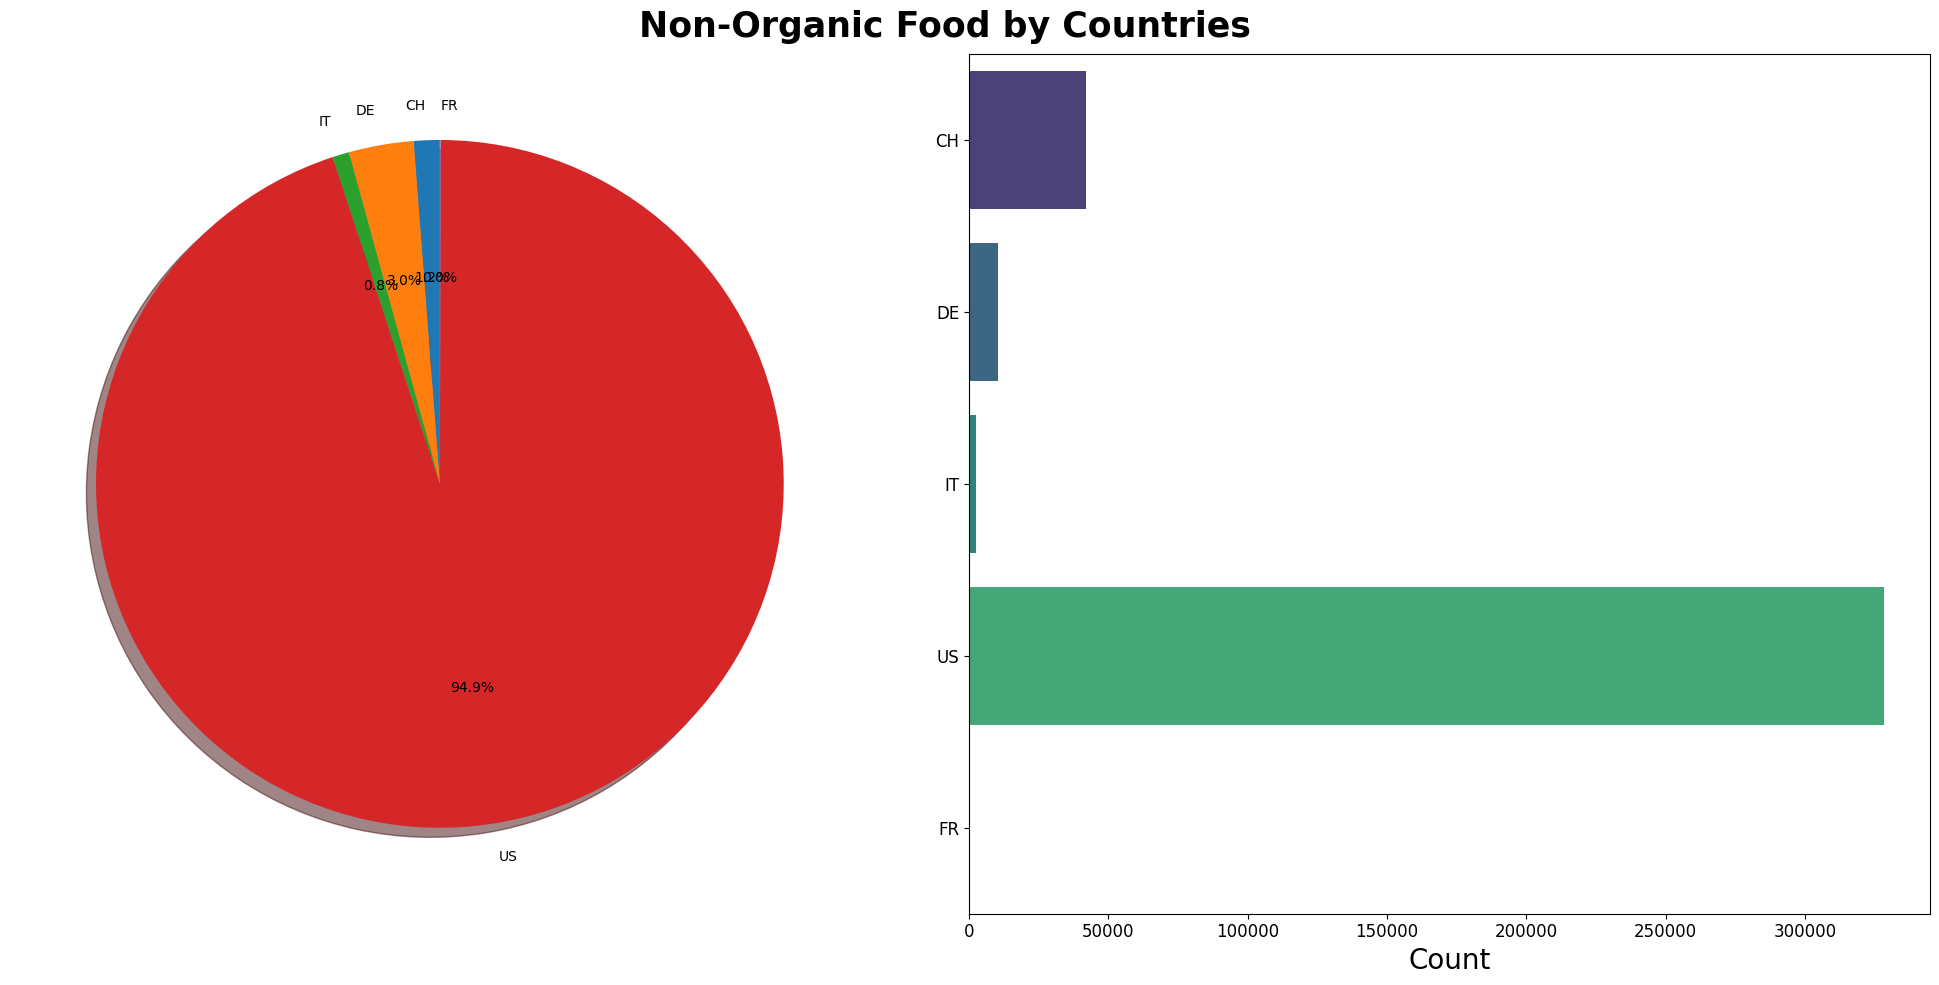

In [16]:
#https://www.kaggle.com/code/mpwolke/not-a-doctor-shh-brooklyn-99
#By Iqbal Syahakbar https://www.kaggle.com/code/iqbalsyahakbar/ps3e18-eda-and-modelling-for-starters/notebook

fig, ax = plt.subplots(1, 2, figsize = (20, 10))
ax = ax.flatten()

labels = 'CH', 'DE', 'IT', 'US', 'FR'
sizes = [4215, 10536, 2715, 328285, 116]
explode = (0.109, 0.0274, 0.007075, 0.8554, 0.00302)#Explode removed from the line below. It was overlapping too MUCH

ax[0].pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    


sns.countplot(data = non_Bio, y = 'country', ax = ax[1], palette = 'viridis', order = Bio['country'].value_counts().index)
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize = 12)
ax[1].set_xlabel('Count', fontsize = 20)
ax[1].set_ylabel(None)
plt.xticks(fontsize = 12)

fig.suptitle('Non-Organic Food by Countries', fontsize = 25, fontweight = 'bold')
plt.tight_layout()

 As I mentioned above, why US percent is 0.8554 (input 14), however the US slice shows 94.9%??

## G3 Distributions of the Organic and Non-Organic products 

"Totals or portions don’t give a very detailed picture. Compare the distributions of the macronutrients between organic and non-organic products in each country. Your solution method should include appropriate visualisations in the subplots format. Note that bar charts aren’t not the best way to communicate distributions"

In [17]:
#Snippet by The Devastator https://www.kaggle.com/code/thedevastator/macros-of-popular-high-protein-foods-eda
import gc

def distplot_features(df, feature, title, color = 'green', categorical=True):
    '''Takes a column from the dataframe and plots the distribution (after count)'''

    if categorical: values = df[feature].value_counts().values
    else: values = df[feature].values

    print('Mean: {:,}'.format(np.mean(values)), "\n"
          'Median: {:,}'.format(np.median(values)), "\n"
          'Max: {:,}'.format(np.max(values)))

    plt.figure(figsize = (18, 3))

    if categorical: sns.distplot(values, hist=False, color = color, kde_kws = {'lw':3})
    else:
        # To speed up the process
        if len(values) > 1000000: sns.distplot(values[::250000], hist=False, color = color, kde_kws = {'lw':3})
        else: sns.distplot(values, hist=False, color = color, kde_kws = {'lw':3})

    plt.title(title, fontsize=15)
    plt.show()    
    del values
    gc.collect()

### Organic Distributions

Kernel Density Estimate (KDE)

"When adding a KDE curve to the plot, the Y-axis represents the probability density function (PDF) of the data. The KDE is a smoothed version of the histogram and provides a continuous estimate of the data distribution."

Kernel Density Estimate (KDE)

"When adding a KDE curve to the plot, the Y-axis represents the probability density function (PDF) of the data. The KDE is a smoothed version of the histogram and provides a continuous estimate of the data distribution."

**My Observations:**

In the Distributions below, the KDE curve provides a smoothed estimate of the density of the Products, giving a continuous view of the distribution.

Remarked:

All product names have a **peak on Zero** (left), very likely are the Nan, missing values. That pattern was seen before both on advanced EDA and on Task C, when many features concentrated most entries of just **one category**.

Mean: 323.0 
Median: 4.0 
Max: 1,502


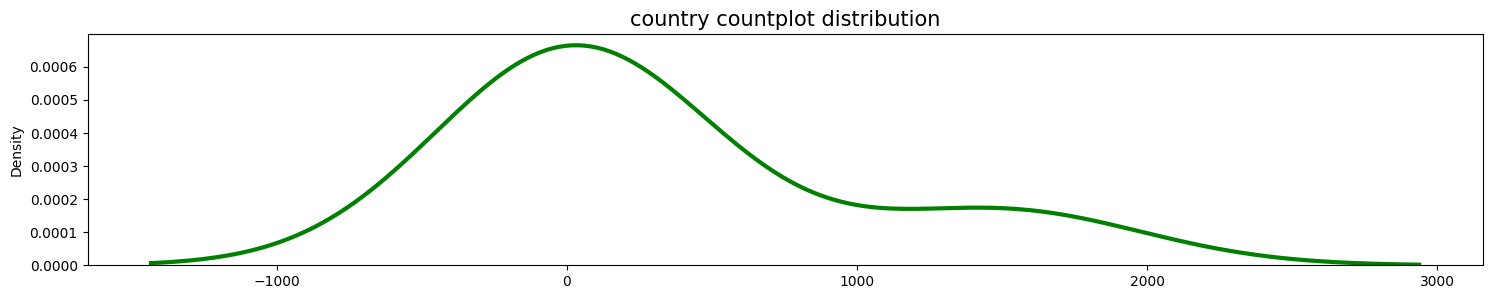

Mean: 1.2199661590524535 
Median: 1.0 
Max: 126


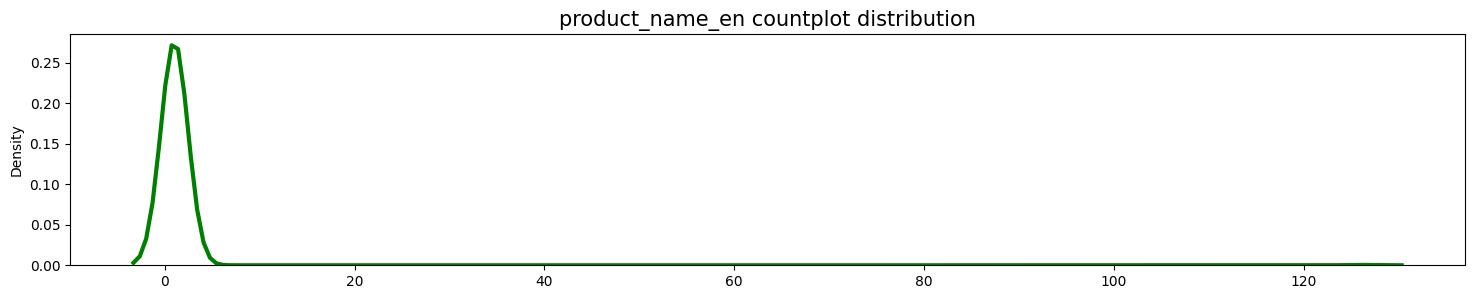

Mean: 1.1210025929127052 
Median: 1.0 
Max: 126


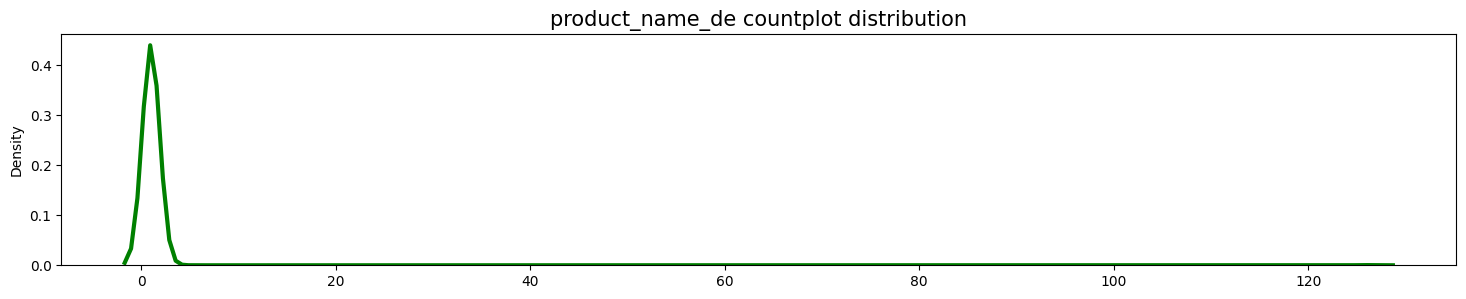

Mean: 1.1201793721973095 
Median: 1.0 
Max: 126


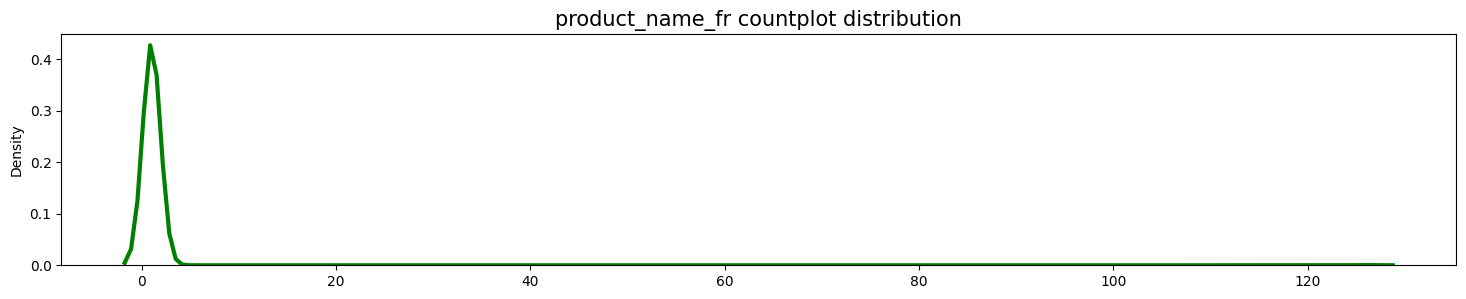

In [18]:
#Snippet by The Devastator https://www.kaggle.com/code/thedevastator/macros-of-popular-high-protein-foods-eda

categorical_features = ["country", "product_name_en", "product_name_de", "product_name_fr"] 

for feature in categorical_features:
    distplot_features(Bio, feature=feature, title = feature + " countplot distribution", color = 'green', categorical=True)

### Non-Organic Distributions

Below, we noticed on product_name_en distribution that there was No rising line. Instead it decreased suddenly, starting from the peak of Zero, then it reproduces the same pattern of the other product_names columns.

Country Distribution is almost the same on both Organic and non-Organic products visualizations. 

Mean: 54,824.142857142855 
Median: 2,715.0 
Max: 328,285


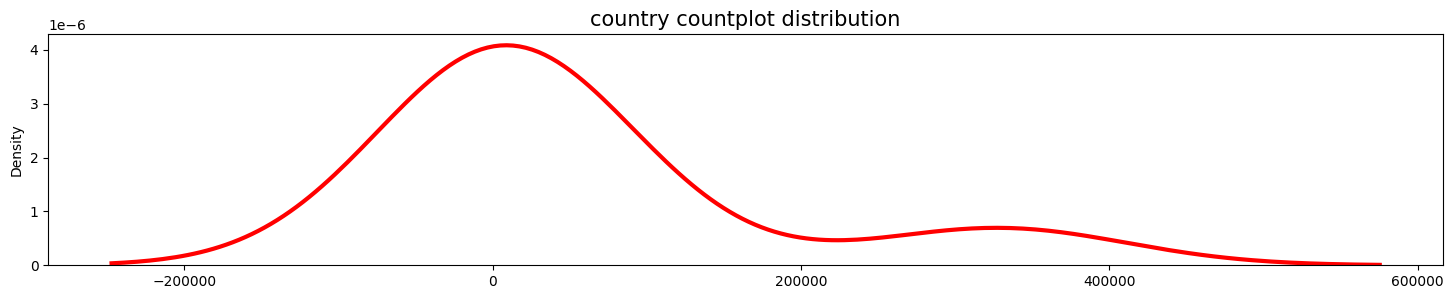

Mean: 1.5391048509359522 
Median: 1.0 
Max: 1,281


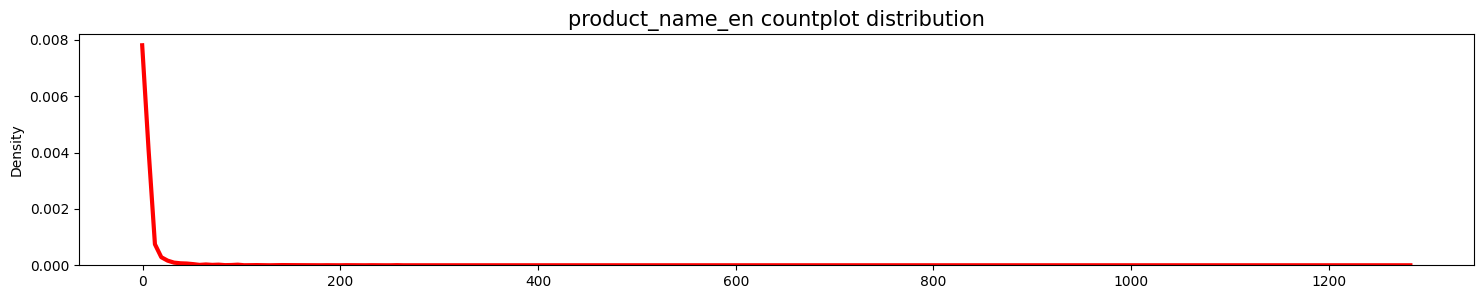

Mean: 1.1541023138313142 
Median: 1.0 
Max: 127


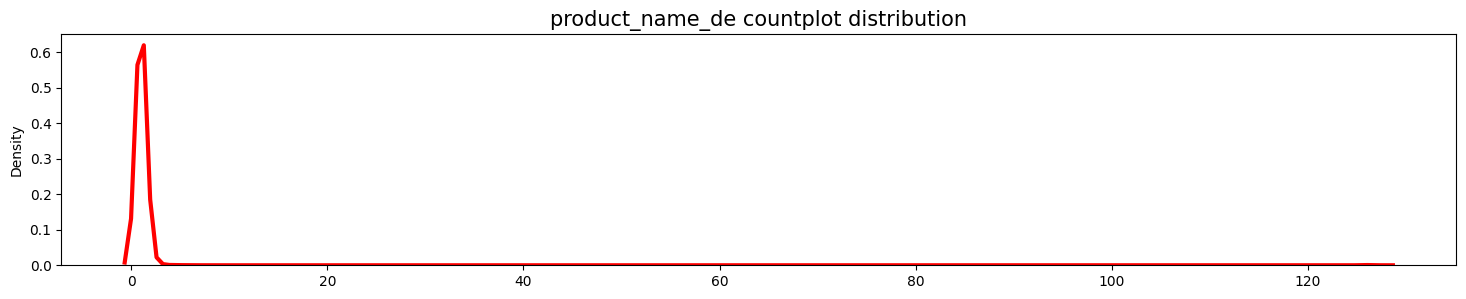

Mean: 1.2235027679919477 
Median: 1.0 
Max: 127


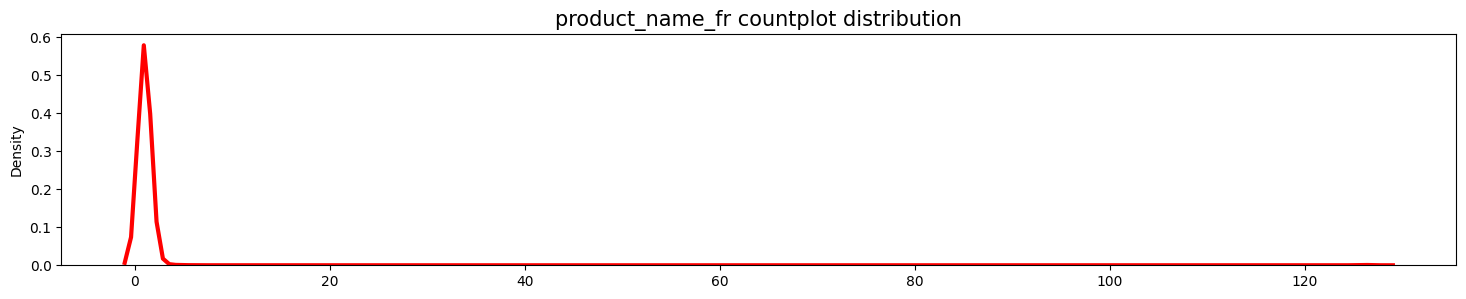

In [19]:
for feature in categorical_features:
    distplot_features(non_Bio, feature=feature, title = feature + " countplot distribution", color = 'red', categorical=True)

## Appendix: working with SQL selecting organic products

### Creating a database

In [20]:
db = sqlite3.connect("data_385k.db")
    
# defining our helper function for running queries
def run_query(query):
        return pd.read_sql_query(query, db)

### Loading the data into the database

In [21]:
df.to_sql(name="data_385k", con=db, if_exists="append", index=False)

385384

### Checking that all the data was loaded

In [22]:
run_query("SELECT COUNT(*) FROM data_385k")

,COUNT(*)
0,385384


#### tbl_name sqlite_master (Master table)

"An important thing to know is that the table names are always listed in a column called tbl_name of a master table called sqlite_master."

In [23]:
#tbl_name sqlite_master (Master table)
#Retrieve tbl_name

run_query("SELECT tbl_name FROM sqlite_master;")

,tbl_name
0,data_385k


### Display a few entries

In [24]:
#Obtain the first five rows of this OpenFood (data_385k) table using

run_query("SELECT * FROM data_385k LIMIT 5;")

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,None,None,75.00,37.50,g,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,0.0,7610809001066,None,None,1.50,1.13,g,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,0.0,8002530159021,None,None,52.68,NaN,g,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,0.0,3033715065788,None,None,70.40,11.97,g,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,0.0,7610848492740,None,None,37.00,7.40,g,None,None,None,...,None,None,None,None,None,None,None,None,None,None


## G.a) Total number of samples by country 

What is the total number of samples by country? Countries with very small sample size should be **dropped** from this analysis as their results may not be statistically significant."

I computed the **number of samples by country** after creating a database using sqlite3 and making queries. 

For my own information: Attention if a column has No hifen, write it with double ticks (i. e "country sample")

In [25]:
query = """
    SELECT "country" AS 'Samples', COUNT(*) AS 'Number'
    FROM data_385k
    GROUP BY "country"
    ORDER BY COUNT(*) DESC;
    """
run_query(query)

,Samples,Number
0,US,328289
1,CH,43617
2,DE,10639
3,IT,2719
4,FR,118
5,UK,1
6,AT,1


### Create a Cursor Object from the Connect object db

"Now to run this query we will show you a different way that does not rely on pandas read_sql_query function. Instead, it works by creating a Cursor object from the Connect object db."

In [26]:
cursor = db.cursor()

#### This cursor object has a method called execute.

In [27]:
cursor.execute(query)

### Drop countries with a very small sample size

Since UK and AT have only a single number, they were deleted

UK **must be with double or ticks**. Otherwise return error saying that UK is NOT a column.

"Rows can be deleted using a query with the keyword DELETE. For example we can delete the UK and AT rows of our database by executing the following query."

In [28]:
#UK must be with double or ticks, Use IN instead of =

delete = """
DELETE FROM data_385k
WHERE country IN ("UK", "AT");
"""
cursor.execute(delete)
db.commit()

### Verifying if United Kingdom (UK) and Austria (AT) rows were DELETED

In [29]:
query = """
    SELECT "country" AS 'Samples', COUNT(*) AS 'Number'
    FROM data_385k
    GROUP BY "country"
    ORDER BY COUNT(*) DESC;
    """
run_query(query)

,Samples,Number
0,US,328289
1,CH,43617
2,DE,10639
3,IT,2719
4,FR,118


Above, we can see that the majority of production was made by US (United States). Mostly, on Pandemics time (2021, April), according to the previous time series task.

### G.b) Number of Organic and Non-organic Products in each country

"Count the number of organic and non-organic products in each country. Is there a country with a higher percentage of organic products?"

In [30]:
#Pick only specific columns. We can specify these in a comma-separated list

#Columns that we want, first 5 rows

run_query("SELECT country, product_name_en, product_name_de, product_name_fr FROM data_385k LIMIT 5;")

,country,product_name_en,product_name_de,product_name_fr
0,CH,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio
1,CH,Naturaplan Mozzarella,Naturaplan Mozzarella,Naturaplan Mozzarella
2,CH,Caffè Mauro - Roasted organic coffee blend,Caffè Mauro - Bio Kaffe,Caffè Mauro - café bio
3,CH,Le chocolat Cailler - chocolate powder,Le chocolat Cailler - schokoladenpulver,Le chocolat Cailler - chocolat en poudre
4,CH,Naturaplan Extra Dark Chocolate 70%,Naturaplan ExtraDunkle Schokolade 70%,Naturaplan Chocolat extra noir 70%


### Use LIKE %word%  to fetch the word that we're searching

"Look for terms such as "bio" and "organic" in the product_names (columns)

When I wrote Or including ALL the 3 product_names it return empty.

The SQL** LIKE Operator** is used in a WHERE clause to search for a specified pattern in a column.

There are two wildcards often used in conjunction with the LIKE operator:

The **percent sign %** represents zero, one, or multiple characters.

https://www.w3schools.com/sql/sql_like.asp
 

In [31]:
#LIKE %word% that we want
#https://stackoverflow.com/questions/14290857/sql-select-where-field-contains-words

#Use WHERE keyword to check

query = '''
SELECT country, product_name_en, product_name_de, product_name_fr FROM data_385K
WHERE product_name_en+ product_name_de+ product_name_fr LIKE '%organic%' OR product_name_en LIKE '%bio%'
LIMIT 5;
'''

run_query(query)    

,country,product_name_en,product_name_de,product_name_fr
0,CH,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio
1,CH,Naturaplan Bio Flower Honey,Naturaplan Bio Blütenhonig,Naturaplan Miel de fleurs Bio
2,CH,Bio Popcorn,Bio Popcorn Mais,Popcorn Maïs Bio
3,CH,Naturaplan Bio Mozzarella,Naturaplan Bio Mozzarella,Naturaplan Mozzarella Bio
4,CH,Naturaplan Bio whole Almonds,Naturaplan Bio Mandeln ganz,Naturaplan Amandes entières Bio


### Adding the total number of country samples.

Below. when the 2nd SELECT is indented, there is a COMMA on the previous line.

In [32]:
query = """
    SELECT country, product_name_en, product_name_de, product_name_fr, "country" AS 'countries', COUNT(*) AS 'prod_numbers',  
       (SELECT COUNT(*) FROM data_385k) AS 'prod_total'
    FROM data_385k
    GROUP BY "country"
    ORDER BY COUNT(*) DESC;
    """
run_query(query)

,country,product_name_en,product_name_de,product_name_fr,countries,prod_numbers,prod_total
0,US,Sprouts Organic Instant Oatmeal,None,None,US,328289,385382
1,CH,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio,CH,43617,385382
2,DE,None,None,Coca cola,DE,10639,385382
3,IT,"SUTTERA, Prestige","SUTTERA, Das Prestige","SUTTERA, Le Prestige",IT,2719,385382
4,FR,None,None,FROMAGE DE BREBIS,FR,118,385382


### Computing the percentage of Total products of each country

Keep the COMMA on the line (2nd line) before the indented SELECT

**q1: is an alias** for the table (temporary table)

Then select an additional column Percent that divides Number by Total, making sure column types have double precision.

SELECT (CAST (q1.Number AS double precision)/CAST (q1.Total AS double precision))*100 AS 'Percent'

ATTENTION: Since I changed number (from the exercise) to prod_numbers and Total to prod_total.

In [33]:
query = """
    
    SELECT *, (CAST (q1.prod_numbers AS double precision)/CAST (q1.prod_total AS double precision))*100 AS 'Percent'
    FROM (SELECT country, product_name_en, product_name_de, product_name_fr, "country" AS 'countries', COUNT(*) AS 'prod_numbers',
       (SELECT COUNT(*) FROM data_385k) AS 'prod_total'
    FROM data_385k
    GROUP BY "country"
    ORDER BY COUNT(*) DESC) q1
    """
run_query(query)

,country,product_name_en,product_name_de,product_name_fr,countries,prod_numbers,prod_total,Percent
0,US,Sprouts Organic Instant Oatmeal,None,None,US,328289,385382,85.185349
1,CH,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio,CH,43617,385382,11.317861
2,DE,None,None,Coca cola,DE,10639,385382,2.760637
3,IT,"SUTTERA, Prestige","SUTTERA, Das Prestige","SUTTERA, Le Prestige",IT,2719,385382,0.705534
4,FR,None,None,FROMAGE DE BREBIS,FR,118,385382,0.030619


The percents above just reproduce the absolute values that we found on the number of samples by country 
 
(Task G.a, first task on this Notebook).

Semi-colon after %  (bio%)

In [34]:
#LIKE %word% that we want
#https://stackoverflow.com/questions/14290857/sql-select-where-field-contains-words

#Use WHERE keyword to check

#query = """
    #SELECT country, product_name_en, product_name_de, product_name_fr, "country" AS 'countries', COUNT(*) AS 'prodBio_numbers'  
    #WHERE product_name_en LIKE '%organic%'
    #   OR product_name_en LIKE '%bio%'; 
    #   (SELECT COUNT(*) FROM data_385k) AS 'prodBio_total'
    #FROM data_385k   
    #GROUP BY "country"
    #ORDER BY COUNT(*) DESC;
    #"""
#run_query(query)

### ': no such table: country

Since I got : ': **no such table: country** after  trying to Select the product_names columns organic/bio  with WHERE/OR and COUNT I stopped the SQL que.